<p><font size="5">
PneumoCatcher - Automated Pneumonia Detection from Chest X-Rays Using Deep Learning
</font></p>

# 1. Demo for Presentation

## 1.0 Set up

### Set up for 1.1 Dataset

In [1]:
# downloading the "x_ray_full_dataset.h5" data file
!pip install gdown
!gdown 1UbM4BpkTzQ3EuboLwjAX07uPnN8yalJ9

Downloading...
From (original): https://drive.google.com/uc?id=1UbM4BpkTzQ3EuboLwjAX07uPnN8yalJ9
From (redirected): https://drive.google.com/uc?id=1UbM4BpkTzQ3EuboLwjAX07uPnN8yalJ9&confirm=t&uuid=96c551d2-22a4-4fa8-82cf-98de4969dc6a
To: /content/x_ray_full_dataset.h5
100% 190M/190M [00:02<00:00, 73.8MB/s]


In [2]:
# converting the "x_ray_full_dataset.h5" file to numpy arrays
import h5py
import numpy as np

with h5py.File('x_ray_full_dataset.h5', 'r') as h5_file:
    X = np.array(h5_file['images'])
    y = np.array(h5_file['labels'])

print(X.shape, y.shape)

(5856, 180, 180) (5856,)


In [3]:
from sklearn.model_selection import train_test_split

X = X / 255.0

X = np.expand_dims(X, axis=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

print(f"X_train.shape: {X_train.shape}   y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}   y_test.shape: {y_test.shape}")
print(f"X_val.shape: {X_val.shape}   y_val.shape: {y_val.shape}")

X_train.shape: (4215, 180, 180, 1)   y_train.shape: (4215,)
X_test.shape: (1172, 180, 180, 1)   y_test.shape: (1172,)
X_val.shape: (469, 180, 180, 1)   y_val.shape: (469,)


### Set up for 1.2 Predictions

In [5]:
# downloading the "pneumonia_detection_model.keras" data file
!gdown 1meyD_R7w54JJelG56IhGUTKL2CTG1Eso

# downloading the "v1_resnet50.keras" model file
!gdown 10_7s75UuntrsneolMDKGJpDMzNYby73F

# downloading the "v3_resnet50.keras" model file
!gdown 1SjIa614iaKPark3mWva6A_L-wYRAZaoq

Downloading...
From (original): https://drive.google.com/uc?id=1meyD_R7w54JJelG56IhGUTKL2CTG1Eso
From (redirected): https://drive.google.com/uc?id=1meyD_R7w54JJelG56IhGUTKL2CTG1Eso&confirm=t&uuid=d590cac8-831b-4318-ae52-c4bb01225bf0
To: /content/pneumonia_detection_model.keras
100% 79.8M/79.8M [00:01<00:00, 57.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=10_7s75UuntrsneolMDKGJpDMzNYby73F
From (redirected): https://drive.google.com/uc?id=10_7s75UuntrsneolMDKGJpDMzNYby73F&confirm=t&uuid=544fd9c4-710c-4db8-b186-dc770dcabed0
To: /content/v1_resnet50.keras
100% 120M/120M [00:02<00:00, 50.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1SjIa614iaKPark3mWva6A_L-wYRAZaoq
From (redirected): https://drive.google.com/uc?id=1SjIa614iaKPark3mWva6A_L-wYRAZaoq&confirm=t&uuid=15937a8f-eced-4545-9844-0c2f1db11053
To: /content/v3_resnet50.keras
100% 192M/192M [00:02<00:00, 82.5MB/s]


In [6]:
import tensorflow as tf

# load the models
model_1 = tf.keras.models.load_model("pneumonia_detection_model.keras")
model_2 = tf.keras.models.load_model("v1_resnet50.keras")
model_3 = tf.keras.models.load_model("v3_resnet50.keras")

# predictions
y_pred_probs_model_1 = model_1.predict(X_test)
y_pred_probs_model_2 = model_2.predict(np.concatenate((X_test,X_test,X_test), axis=3))
y_pred_probs_model_3 = model_3.predict(np.concatenate((X_test,X_test,X_test), axis=3))

y_pred_model_1 = (y_pred_probs_model_1 > 0.5).astype(int).flatten()
y_pred_model_2 = (y_pred_probs_model_2 > 0.5).astype(int).flatten()
y_pred_model_3 = (y_pred_probs_model_3 > 0.5).astype(int).flatten()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step


## 1.1 Dataset

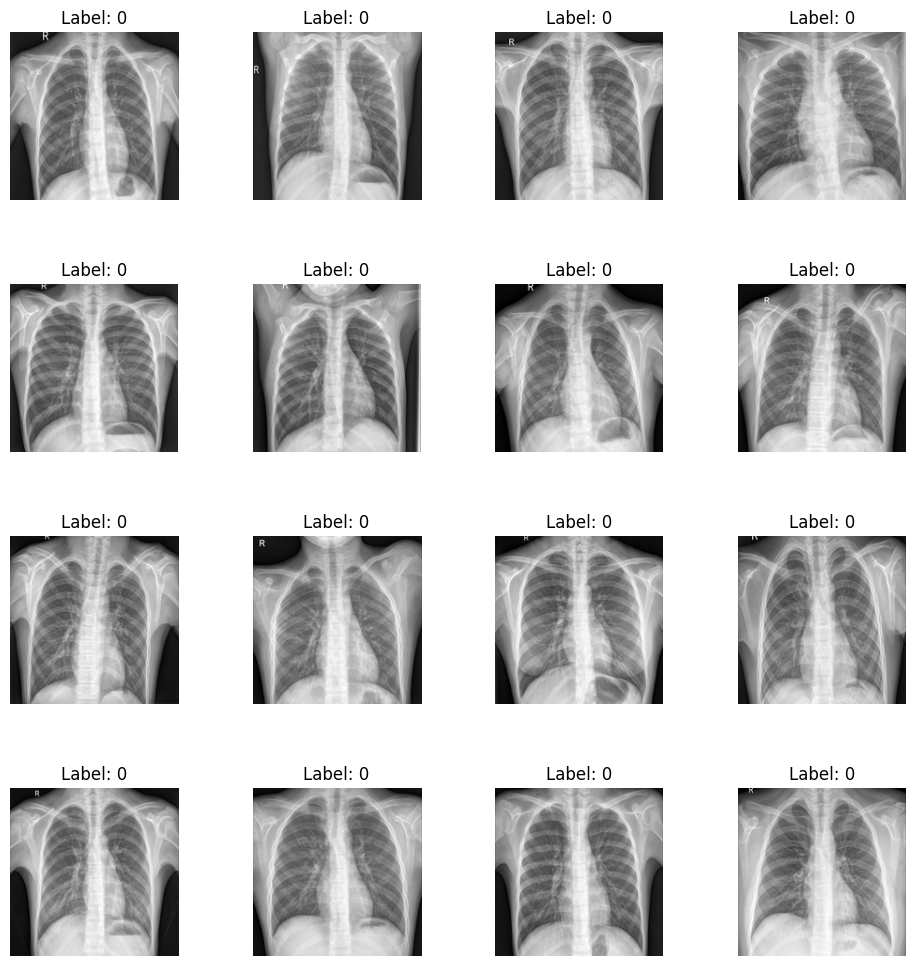

In [7]:
# displaying 16 data points
import numpy as np
import matplotlib.pyplot as plt

def display_x_rays(X, y, rows=4, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i], cmap='gray')
        ax.set_title(f'Label: {y[i]}')
        ax.axis('off')
    plt.show()

display_x_rays(X, y)

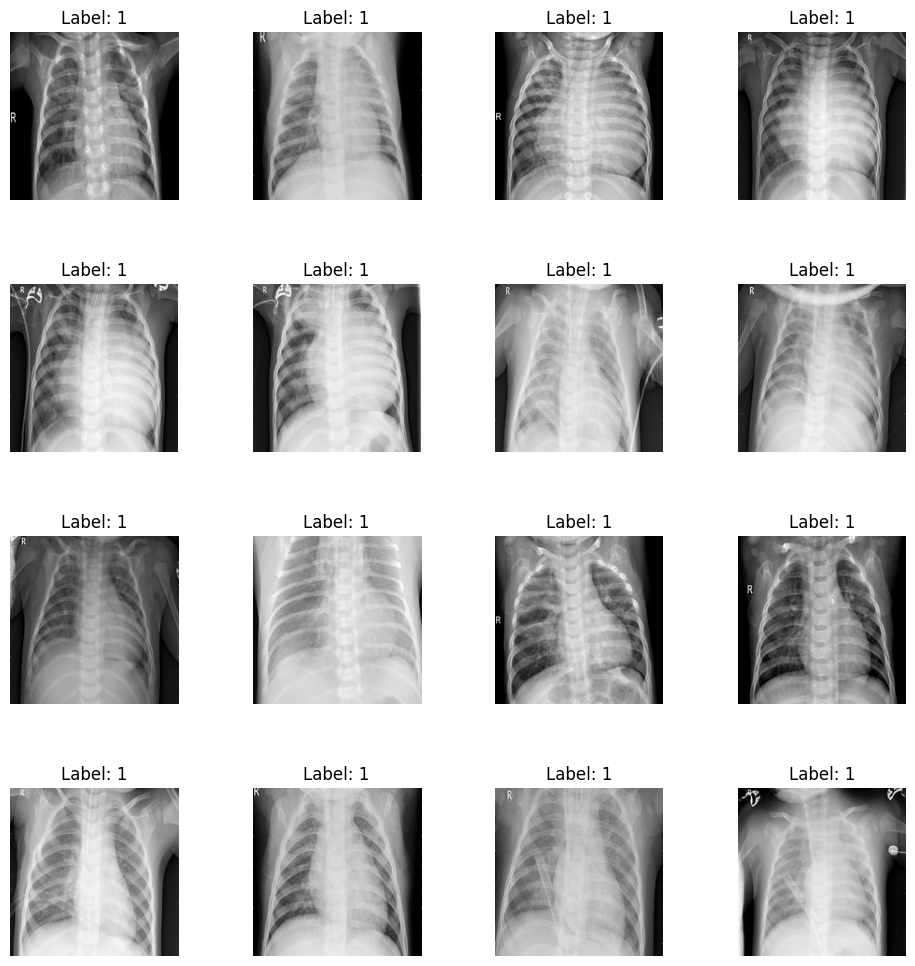

In [8]:
# displaying 16 data points
import numpy as np
import matplotlib.pyplot as plt

def display_x_rays(X, y, rows=4, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i], cmap='gray')
        ax.set_title(f'Label: {y[i]}')
        ax.axis('off')
    plt.show()

display_x_rays(X[5000:], y[5000:])

## 1.2 Predictions

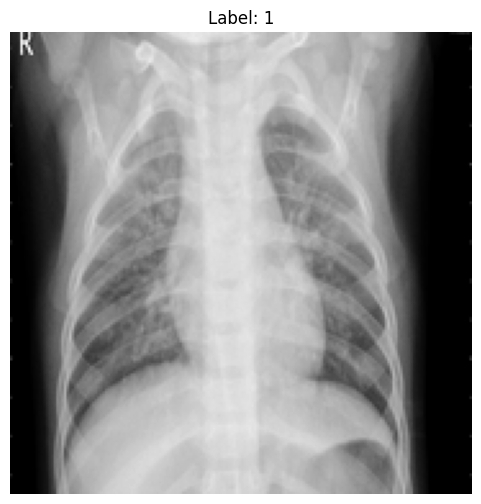


        True Label:   1
Model 1 Prediction:   1
Model 2 Prediction:   1
Model 3 Prediction:   1

             Index:   7


In [9]:
import numpy as np
import matplotlib.pyplot as plt



###### Update this variable ######
# try values of: 7, 20, 12, 0, 2, 19
pred_index = 7
# 7, 20, 12: all correct
# 0: two wrong
# 2, 19: all wrong

def display_single_x_ray(image, label):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

display_single_x_ray(X_test[pred_index], y_test[pred_index])

print(f"\n        True Label:   {y_test[pred_index]}")
print(f"Model 1 Prediction:   {y_pred_model_1[pred_index]}")
print(f"Model 2 Prediction:   {y_pred_model_2[pred_index]}")
print(f"Model 3 Prediction:   {y_pred_model_3[pred_index]}\n")
print(f"             Index:   {pred_index}")

## 1.3 Grad-CAM Visualization

(-0.5, 179.5, 179.5, -0.5)

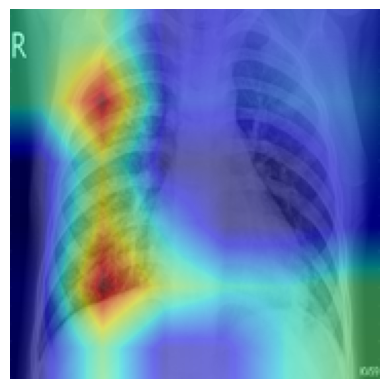

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os



###### Update this variable ######
# try values of: 1, 6, 15, 5, 23, 7, 29
gradcam_index = 1
# 1, 6, 15: good
# 5, 23: not so good
# 7, 29: alright




# get true positive indices
model_3_tp = np.where((y_test == 1) & (y_pred_model_3 == 1))[0]

# creating first part of model (inputs to final conv layer)
last_conv_layer = model_3.get_layer("conv5_block3_out")
last_conv_layer_model = tf.keras.Model(model_3.inputs, last_conv_layer.output)

# creating second part of model (final conv layer to final model layer)
classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in ["global_average_pooling2d", "dense", "dense_1"]:
    x = model_3.get_layer(layer_name)(x)
classifier_model = tf.keras.Model(classifier_input, x)

# generate the Grad-CAM visualization
img_gray_gradcam = X_test[model_3_tp[gradcam_index]]
image = np.concatenate((img_gray_gradcam, img_gray_gradcam, img_gray_gradcam), axis=2)


# display original x ray, true label and model prediction
## display_single_x_ray(X_test[model_3_tp[gradcam_model_3_index]], y_test[model_3_tp[gradcam_model_3_index]])
## print(f"\n        True Label:   {y_test[model_3_tp[gradcam_model_3_index]]}")
## print(f"Model 3 Prediction:   {y_pred_model_3[model_3_tp[gradcam_model_3_index]]}\n")
## print(f"             Index:   {model_3_tp[gradcam_model_3_index]}\n")


# record the gradients
with tf.GradientTape() as tape:
    inputs = image[np.newaxis, ...]
    last_conv_layer_output = last_conv_layer_model(inputs)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)

# retrieve the gradients
grads = tape.gradient(preds, last_conv_layer_output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# convert to numpy arrays
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()

# apply gradient information
for j in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, j] *= pooled_grads[j]

# average, clip (to only obtain positive gradients) and normalize values
gradcam = np.mean(last_conv_layer_output, axis=-1)
gradcam = np.clip(gradcam, 0, np.max(gradcam)) / np.max(gradcam)
gradcam = cv2.resize(gradcam, (180, 180))

# display and save visualization
plt.imshow(image)
plt.imshow(gradcam, cmap='jet', alpha=0.5)
plt.axis('off')